In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import statsmodels.api as sm
import numpy as np
from scipy.stats import ks_2samp, chi2_contingency

In [2]:
path_dep_var = r"C:\Users\soere\OneDrive\Desktop\Python MA\2.2 Saving the Dependent Variables"

control_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\0. Pretransformed Data"

classification_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\0.1 Classification Data"

control_all_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\1.2 Saving the Independent Variables"

save_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\7.2. Saving EDA"

In [3]:
# Loading the provided CSV files into dataframes
df_total = pd.read_csv(f"{path_dep_var}\Total_Dep.csv")
final_df = pd.read_csv(f"{path_dep_var}\Main_Dep.csv")

In [4]:
df_total.columns

Index(['id_inequality', 'i_Grossbuchstabe', 'i_Ziffer', 'd_Hauptberuf_m',
       'd_Hauptberuf_w', 'rb_id', 'd_Hauptberuf', 'high', 'medium', 'low',
       'unskilled', 'intermediate', 'per_high', 'per_medium', 'per_low',
       'per_unskilled'],
      dtype='object')

# Full data

In [5]:
# Loading the provided .dta (Stata data) file into a dataframe
occupation_detailed_df = pd.read_stata(f"{classification_path}\occupation_detailed.dta")

In [6]:
occupation_detailed_df["d_Hauptberuf"] = occupation_detailed_df["d_Hauptberuf_m"]+occupation_detailed_df["d_Hauptberuf_w"]

In [7]:
print(f"total people:{occupation_detailed_df['d_Hauptberuf'].sum()}")
print(f"total male:{occupation_detailed_df['d_Hauptberuf_m'].sum()}")
print(f"total female:{occupation_detailed_df['d_Hauptberuf_w'].sum()}")

total people:17973256.0
total male:12223064.0
total female:5750192.0


In [8]:
# primary
agri_df = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"]=="A"]
print(f"total people:{agri_df['d_Hauptberuf'].sum()}")
print(f"total male:{agri_df['d_Hauptberuf_m'].sum()}")
print(f"total female:{agri_df['d_Hauptberuf_w'].sum()}")

total people:5857819.0
total male:3143653.0
total female:2714166.0


In [9]:
# industry
agri_df = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"]=="B"]
print(f"total people:{agri_df['d_Hauptberuf'].sum()}")
print(f"total male:{agri_df['d_Hauptberuf_m'].sum()}")
print(f"total female:{agri_df['d_Hauptberuf_w'].sum()}")

total people:6687715.0
total male:5609988.0
total female:1077727.0


In [10]:
agri_df = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"]=="F"]
print(f"total people:{agri_df['d_Hauptberuf'].sum()}")
print(f"total male:{agri_df['d_Hauptberuf_m'].sum()}")
print(f"total female:{agri_df['d_Hauptberuf_w'].sum()}")

total people:2067150.0
total male:998668.0
total female:1068482.0


# Grouped df_total

In [11]:
grouped_df_total = df_total.groupby(["i_Grossbuchstabe", "i_Ziffer"])[["d_Hauptberuf_m", "d_Hauptberuf_w", "d_Hauptberuf", 
                                                         "high", "medium", "low", "unskilled", "intermediate"]].sum()

grouped_df_total = grouped_df_total.reset_index()

grouped_df_total

,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,high,medium,low,unskilled,intermediate
0,A,1,2987634.0,2688482.0,5676116.0,0.000000,731074.660493,645258.151939,4.299783e+06,0.0
1,A,2,75618.0,16911.0,92529.0,0.000000,0.000000,0.000000,9.252900e+04,0.0
2,A,3,1578.0,123.0,1701.0,0.000000,0.000000,0.000000,1.701000e+03,0.0
3,A,4,59974.0,7293.0,67267.0,0.000000,14496.333651,52770.666349,0.000000e+00,0.0
4,A,5,10345.0,927.0,11272.0,0.000000,0.000000,9070.719536,2.201280e+03,0.0
...,...,...,...,...,...,...,...,...,...,...
203,E,4,120388.0,55900.0,176288.0,48537.193635,116509.315872,11241.490492,0.000000e+00,0.0
204,E,5,47718.0,75641.0,123359.0,25348.528119,21277.403891,76733.067990,0.000000e+00,0.0
205,E,6,4806.0,561.0,5367.0,5367.000000,0.000000,0.000000,0.000000e+00,0.0
206,E,7,5101.0,1492.0,6593.0,0.000000,0.000000,6593.000000,0.000000e+00,0.0


In [12]:
sum_Haupt = grouped_df_total["d_Hauptberuf"].sum()

In [13]:
# Aus dem Band von 1914
Pr_pop = 37293264
Ger_pop = 60641489
print(f"{Pr_pop/Ger_pop}")

0.6149793584389064


# Skills total

In [14]:
sum_h = grouped_df_total["high"].sum()
sum_m = grouped_df_total["medium"].sum()
sum_l = grouped_df_total["low"].sum()
sum_u = grouped_df_total["unskilled"].sum()

print(sum_h)
print(sum_m)
print(sum_l)
print(sum_u)

167383.76833926706
4421619.865283126
4105665.5585588845
7196701.807818724


## Compare Pr und GER
Graph and Tests

In [15]:
# load data on GER
df_GER_aggr = pd.read_excel(f"{control_path}\Daten Occupation Deutschland für Test und Graph.xlsx", dtype=str)
df_GER_aggr["Summe"] = df_GER_aggr["Summe"].astype(float)
df_GER_aggr.columns

Index(['Letter', 'Letter Description', 'Roman', 'Roman Description', 'Number',
       'Number Description', 'Summe', 'a1', 'a2', 'a3', 'b1', 'b2', 'b3', 'c1',
       'c2', 'c3', 'Unnamed: 16', 'Unnamed: 17', 'afr'],
      dtype='object')

In [16]:
df_GER_aggr = df_GER_aggr.rename(columns={"Letter": "i_Grossbuchstabe", "Number": "i_Ziffer"})
df_GER_aggr["i_Ziffer"] = df_GER_aggr["i_Ziffer"].astype(int)

In [17]:
merged_df = pd.merge(grouped_df_total, df_GER_aggr[["i_Grossbuchstabe", "i_Ziffer", "Summe"]], on=["i_Grossbuchstabe", "i_Ziffer"], how="left")

only compare for which we dont use regional prussian data

In [18]:
# Dropping the row where 'Letter' is 'A' and 'Number' is 1
merged_df = merged_df[~((merged_df["i_Grossbuchstabe"] == 'A') & (merged_df["i_Ziffer"] == 1))]
merged_df = merged_df[~((merged_df["i_Grossbuchstabe"] == 'A') & (merged_df["i_Ziffer"] == 4))]
merged_df = merged_df[~((merged_df["i_Grossbuchstabe"] == 'C') & (merged_df["i_Ziffer"] == 12))]
merged_df = merged_df[~((merged_df["i_Grossbuchstabe"] == 'C') & (merged_df["i_Ziffer"] == 13))]
merged_df = merged_df[~(merged_df["i_Grossbuchstabe"] == 'D')]
merged_df = merged_df[~(merged_df["i_Grossbuchstabe"] == 'E')]

# Calculate the sum of "Summe" column
sum_Ger = merged_df["Summe"].sum()
# Calculate the share_Ger column
merged_df["share_Ger"] = (merged_df["Summe"] / sum_Ger) * 100

merged_df

,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,high,medium,low,unskilled,intermediate,Summe,share_Ger
1,A,2,75618.0,16911.0,92529.0,0.000000,0.000000,0.000000,92529.000000,0.0,148237.0,1.045214
2,A,3,1578.0,123.0,1701.0,0.000000,0.000000,0.000000,1701.000000,0.0,2433.0,0.017155
4,A,5,10345.0,927.0,11272.0,0.000000,0.000000,9070.719536,2201.280464,0.0,13114.0,0.092466
5,A,6,8504.0,430.0,8934.0,0.000000,0.000000,7284.904799,1649.095201,0.0,11691.0,0.082433
6,B,1,60883.0,2675.0,63558.0,1232.329553,2433.520014,34039.698055,25852.452379,0.0,81644.0,0.575669
...,...,...,...,...,...,...,...,...,...,...,...,...
193,C,23,7914.0,1158.0,9072.0,0.000000,0.000000,0.000000,9072.000000,0.0,19228.0,0.135576
194,C,24,9166.0,659.0,9825.0,0.000000,0.000000,0.000000,9825.000000,0.0,16506.0,0.116383
195,C,25,871.0,55.0,926.0,0.000000,0.000000,926.000000,0.000000,0.0,1459.0,0.010287
196,C,26,2575.0,774.0,3349.0,0.000000,1376.189332,0.000000,1972.810668,0.0,7780.0,0.054856


In [19]:
sum_Pr = merged_df["d_Hauptberuf"].sum()
merged_df["share_Prussia"] = (merged_df["d_Hauptberuf"] / sum_Pr)*100
merged_df

,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,high,medium,low,unskilled,intermediate,Summe,share_Ger,share_Prussia
1,A,2,75618.0,16911.0,92529.0,0.000000,0.000000,0.000000,92529.000000,0.0,148237.0,1.045214,1.103605
2,A,3,1578.0,123.0,1701.0,0.000000,0.000000,0.000000,1701.000000,0.0,2433.0,0.017155,0.020288
4,A,5,10345.0,927.0,11272.0,0.000000,0.000000,9070.719536,2201.280464,0.0,13114.0,0.092466,0.134443
5,A,6,8504.0,430.0,8934.0,0.000000,0.000000,7284.904799,1649.095201,0.0,11691.0,0.082433,0.106557
6,B,1,60883.0,2675.0,63558.0,1232.329553,2433.520014,34039.698055,25852.452379,0.0,81644.0,0.575669,0.758064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,C,23,7914.0,1158.0,9072.0,0.000000,0.000000,0.000000,9072.000000,0.0,19228.0,0.135576,0.108203
194,C,24,9166.0,659.0,9825.0,0.000000,0.000000,0.000000,9825.000000,0.0,16506.0,0.116383,0.117184
195,C,25,871.0,55.0,926.0,0.000000,0.000000,926.000000,0.000000,0.0,1459.0,0.010287,0.011045
196,C,26,2575.0,774.0,3349.0,0.000000,1376.189332,0.000000,1972.810668,0.0,7780.0,0.054856,0.039944


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\soere\AppData\Local\Temp\ipykernel_2660\694279518.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:.0f}%".format(x) for x in vals])


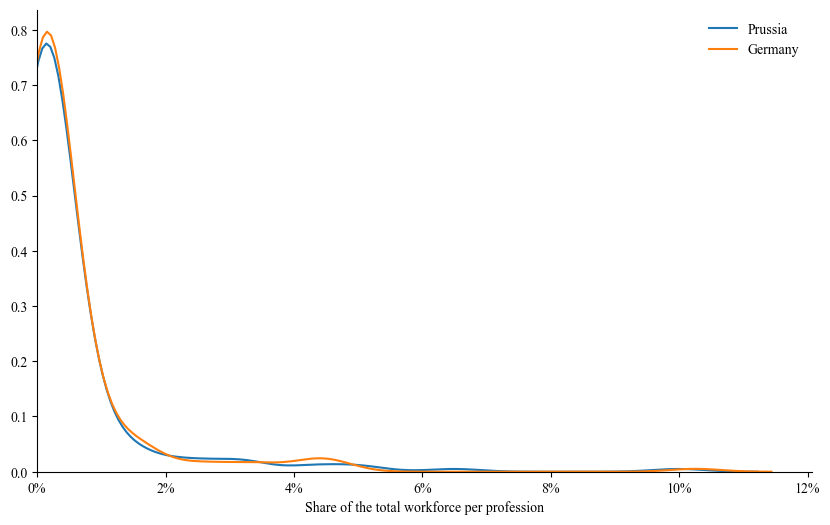

In [21]:
# Setting the font
plt.rcParams["font.family"] = "Times New Roman"

# Creating KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(merged_df["share_Prussia"], label="Prussia", bw_adjust=1)
sns.kdeplot(merged_df["share_Ger"], label="Germany", bw_adjust=1)

# Removing the right and top spines
sns.despine()

# Additional plot settings
plt.xlabel("Share of the total workforce per profession")
plt.ylabel("")
plt.legend(frameon=False)
plt.xlim(0, None)

# Set the x-axis to display percentages
ax = plt.gca()
vals = ax.get_xticks()
ax.set_xticklabels(["{:.0f}%".format(x) for x in vals])

# Show plot
plt.show()

In [22]:


ks_stat, ks_p_value = ks_2samp(merged_df["share_Prussia"], merged_df["share_Ger"])
print("KS Test Statistic:", ks_stat)
print("P-Value:", ks_p_value)


KS Test Statistic: 0.06701030927835051
P-Value: 0.7778015151717944


# Unskilled in Agri

In [23]:
sum_un = grouped_df_total["unskilled"].sum()
# Filter the DataFrame 
sum_un_agri = grouped_df_total.loc[(grouped_df_total["i_Grossbuchstabe"] == "A") & (grouped_df_total["i_Ziffer"] == 1), "unskilled"].iloc[0]
sum_Hauptberuf_agri = grouped_df_total.loc[(grouped_df_total["i_Grossbuchstabe"] == "A") & (grouped_df_total["i_Ziffer"] == 1), "d_Hauptberuf"].iloc[0]
print(f"{sum_un_agri}")
print(f"{sum_un_agri/sum_un}")
print(f"{sum_un_agri/sum_Hauptberuf_agri}")

4299783.187568345
0.5974657978599204
0.7575220780492057


In [24]:
d_Hauptberuf = grouped_df_total["d_Hauptberuf"].sum()
sum_Hauptberuf_agri/d_Hauptberuf

0.3571822720645059

# Potsdam

In [25]:
df_total

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled,intermediate,per_high,per_medium,per_low,per_unskilled
0,1.0,A,4,69.0,100.0,17.0,169.0,NaN,33.847785,135.152215,NaN,NaN,0.0,0.200283,0.799717,0.000000
1,2.0,A,4,155.0,44.0,17.0,199.0,NaN,39.856268,159.143732,NaN,NaN,0.0,0.200283,0.799717,0.000000
2,4.0,A,4,68.0,0.0,17.0,68.0,NaN,13.619227,54.380773,NaN,NaN,0.0,0.200283,0.799717,0.000000
3,5.0,A,4,85.0,11.0,17.0,96.0,NaN,19.227144,76.772856,NaN,NaN,0.0,0.200283,0.799717,0.000000
4,6.0,A,4,376.0,68.0,17.0,444.0,NaN,88.925542,355.074458,NaN,NaN,0.0,0.200283,0.799717,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76473,698.0,A,1,6929.0,4864.0,1.0,11793.0,NaN,1608.452868,2445.051798,7739.495334,NaN,0.0,0.136390,0.207331,0.656279
76474,699.0,A,1,3807.0,3802.0,31.0,7609.0,NaN,1013.316352,1573.447001,5022.236647,NaN,0.0,0.133173,0.206788,0.660039
76475,700.0,A,1,2647.0,300.0,31.0,2947.0,NaN,392.461991,609.403116,1945.134893,NaN,0.0,0.133173,0.206788,0.660039
76476,701.0,A,1,3313.0,3884.0,31.0,7197.0,NaN,958.448913,1488.250502,4750.300585,NaN,0.0,0.133173,0.206788,0.660039


id_inequality of Potsdam = 95.0 	

In [26]:
df_Pots_mil = df_total[((df_total["i_Grossbuchstabe"] == "E") & (df_total["i_Ziffer"] == 1))]
df_Pots_mil

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled,intermediate,per_high,per_medium,per_low,per_unskilled
1722,1.0,E,1,538.0,0.0,17.0,538.0,26.051033,NaN,511.948967,NaN,NaN,0.048422,0.0,0.951578,0.0
1723,2.0,E,1,1093.0,0.0,17.0,1093.0,52.925241,NaN,1040.074759,NaN,NaN,0.048422,0.0,0.951578,0.0
1724,4.0,E,1,9816.0,0.0,17.0,9816.0,475.310304,NaN,9340.689696,NaN,NaN,0.048422,0.0,0.951578,0.0
1725,5.0,E,1,378.0,0.0,17.0,378.0,18.303514,NaN,359.696486,NaN,NaN,0.048422,0.0,0.951578,0.0
1726,6.0,E,1,16.0,0.0,17.0,16.0,0.774752,NaN,15.225248,NaN,NaN,0.048422,0.0,0.951578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,698.0,E,1,3723.0,0.0,1.0,3723.0,147.389108,NaN,3575.610892,NaN,NaN,0.039589,0.0,0.960411,0.0
2291,699.0,E,1,27.0,0.0,31.0,27.0,2.377358,NaN,24.622642,NaN,NaN,0.088050,0.0,0.911950,0.0
2292,700.0,E,1,9.0,0.0,31.0,9.0,0.792453,NaN,8.207547,NaN,NaN,0.088050,0.0,0.911950,0.0
2293,701.0,E,1,119.0,0.0,31.0,119.0,10.477987,NaN,108.522013,NaN,NaN,0.088050,0.0,0.911950,0.0


In [27]:
nnth_percentile = df_Pots_mil["d_Hauptberuf"].quantile(0.9891)
nnth_percentile


6452.5304

In [28]:
mil_in_Pots = df_Pots_mil[df_Pots_mil["id_inequality"] == 95.0]
mil_in_Pots

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled,intermediate,per_high,per_medium,per_low,per_unskilled
1801,95.0,E,1,6453.0,0.0,29.0,6453.0,553.26561,NaN,5899.73439,NaN,NaN,0.085738,0.0,0.914262,0.0


#### Hofstaat

In [29]:
df_Pots_mil = df_total[((df_total["i_Grossbuchstabe"] == "E") & (df_total["i_Ziffer"] == 2))]
df_Pots_mil

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled,intermediate,per_high,per_medium,per_low,per_unskilled
4590,1.0,E,2,419.0,25.0,17.0,444.0,60.698127,NaN,383.301873,NaN,NaN,0.136707,0.0,0.863293,0.0
4591,2.0,E,2,212.0,8.0,17.0,220.0,30.075648,NaN,189.924352,NaN,NaN,0.136707,0.0,0.863293,0.0
4592,4.0,E,2,2984.0,166.0,17.0,3150.0,430.628602,NaN,2719.371398,NaN,NaN,0.136707,0.0,0.863293,0.0
4593,5.0,E,2,46.0,2.0,17.0,48.0,6.561960,NaN,41.438040,NaN,NaN,0.136707,0.0,0.863293,0.0
4594,6.0,E,2,154.0,1.0,17.0,155.0,21.189661,NaN,133.810339,NaN,NaN,0.136707,0.0,0.863293,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5159,698.0,E,2,200.0,0.0,1.0,200.0,25.031863,NaN,174.968137,NaN,NaN,0.125159,0.0,0.874841,0.0
5160,699.0,E,2,251.0,6.0,31.0,257.0,48.010989,NaN,208.989011,NaN,NaN,0.186813,0.0,0.813187,0.0
5161,700.0,E,2,32.0,0.0,31.0,32.0,5.978022,NaN,26.021978,NaN,NaN,0.186813,0.0,0.813187,0.0
5162,701.0,E,2,122.0,0.0,31.0,122.0,22.791209,NaN,99.208791,NaN,NaN,0.186813,0.0,0.813187,0.0


In [30]:
nnth_percentile = df_Pots_mil["d_Hauptberuf"].quantile(0.9891)
nnth_percentile


3741.371199999956

In [31]:
mil_in_Pots = df_Pots_mil[df_Pots_mil["id_inequality"] == 95.0]
mil_in_Pots

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled,intermediate,per_high,per_medium,per_low,per_unskilled
4669,95.0,E,2,1524.0,61.0,29.0,1585.0,248.390906,NaN,1336.609094,NaN,NaN,0.156714,0.0,0.843286,0.0


# Coal

In [32]:
grouped_df_total

,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,high,medium,low,unskilled,intermediate
0,A,1,2987634.0,2688482.0,5676116.0,0.000000,731074.660493,645258.151939,4.299783e+06,0.0
1,A,2,75618.0,16911.0,92529.0,0.000000,0.000000,0.000000,9.252900e+04,0.0
2,A,3,1578.0,123.0,1701.0,0.000000,0.000000,0.000000,1.701000e+03,0.0
3,A,4,59974.0,7293.0,67267.0,0.000000,14496.333651,52770.666349,0.000000e+00,0.0
4,A,5,10345.0,927.0,11272.0,0.000000,0.000000,9070.719536,2.201280e+03,0.0
...,...,...,...,...,...,...,...,...,...,...
203,E,4,120388.0,55900.0,176288.0,48537.193635,116509.315872,11241.490492,0.000000e+00,0.0
204,E,5,47718.0,75641.0,123359.0,25348.528119,21277.403891,76733.067990,0.000000e+00,0.0
205,E,6,4806.0,561.0,5367.0,5367.000000,0.000000,0.000000,0.000000e+00,0.0
206,E,7,5101.0,1492.0,6593.0,0.000000,0.000000,6593.000000,0.000000e+00,0.0


In [33]:
coal_df = grouped_df_total[((grouped_df_total["i_Grossbuchstabe"] == "B") & (grouped_df_total["i_Ziffer"] == 4))]
coal_un = coal_df["unskilled"].sum()
coal_un

224589.57980554993

In [59]:
coal_sum = coal_df["d_Hauptberuf"].sum()
share_coal = coal_sum / d_Hauptberuf
share_coal

0.034274512878718896

In [35]:
df_Ind = grouped_df_total[((grouped_df_total["i_Grossbuchstabe"] == "B"))]
sum_Ind_un = df_Ind["unskilled"].sum()
print(f"{coal_un/sum_Ind_un}")

0.09944575166179662


In [36]:
coal_l = coal_df["low"].sum()
sum_Ind_l = df_Ind["low"].sum()
coal_l/sum_Ind_l

0.18217013839335264

In [37]:
coal_l = coal_df["medium"].sum()
sum_Ind_l = df_Ind["medium"].sum()
coal_l/sum_Ind_l

0.005619081862638324

In [38]:
coal_l = coal_df["d_Hauptberuf"].sum()
sum_Ind_l = df_Ind["d_Hauptberuf"].sum()
coal_l/sum_Ind_l

0.08162305296883851

# Primary

In [39]:
d_Hauptberuf = grouped_df_total["d_Hauptberuf"].sum()


In [40]:
df_Agri = grouped_df_total[((grouped_df_total["i_Grossbuchstabe"] == "A"))]
d_Hauptberuf_Agri = df_Agri["d_Hauptberuf"].sum()
sum_Agri_un = df_Agri["unskilled"].sum()
print(f"{d_Hauptberuf_Agri/d_Hauptberuf}")
print(f"{sum_Agri_un/sum_un}")
print(f"{sum_Agri_un/d_Hauptberuf_Agri}")

0.3686163390182005
0.611094315239716
0.7507680867629076


# Industry

In [41]:
df_Ind = grouped_df_total[((grouped_df_total["i_Grossbuchstabe"] == "B"))]
d_Hauptberuf_Ind = df_Ind["d_Hauptberuf"].sum()
sum_Ind_un = df_Ind["unskilled"].sum()
print(f"{d_Hauptberuf_Ind/d_Hauptberuf}")
print(f"{sum_Ind_un/sum_un}")
print(f"{sum_Ind_un/d_Hauptberuf_Ind}")

0.4199121649101264
0.3138122260679753
0.33844144814745675


# Sources of Power
Jahrbuch 1910 (based on Band 214)

In [42]:
water_hp = 868720
steam_hp = 7278995
electric_kw = 1541684
electric_hp = electric_kw * 1.35962 #unit google converter
total_hp = 8826616

In [43]:
sum_hp = water_hp + steam_hp + electric_hp
s_water = water_hp / sum_hp * 100
s_steam = steam_hp / sum_hp * 100
s_electric = electric_hp / sum_hp * 100
print(f"share water: {s_water} %, share steam: {s_steam} %, share electricity: {s_electric} %")

share water: 8.480430648681835 %, share steam: 71.05743195690422 %, share electricity: 20.462137394413947 %


# Staatsdienst etc.

In [44]:
df_Agri = grouped_df_total[((grouped_df_total["i_Grossbuchstabe"] == "E"))]
sum_high = grouped_df_total["high"].sum()
d_Hauptberuf_Agri = df_Agri["d_Hauptberuf"].sum()
sum_Agri_un = df_Agri["high"].sum()
print(f"{d_Hauptberuf_Agri/d_Hauptberuf}")
print(f"{sum_Agri_un/sum_high}")

0.06478767628041658
0.7844138149415366


# Berlin und Potsdam
95.0 und 78.0

In [45]:
final_df

,id_inequality,d_Hauptberuf,high,medium,low,unskilled,Industriearbeiter,Anteil_Industriearbeiter,per_high,per_medium,per_low,per_unskilled
0,1.0,25514.0,194.671849,5581.089181,5694.943234,14043.295736,5482.0,0.214862,0.007630,0.218746,0.223209,0.550415
1,2.0,20208.0,188.102372,4557.120081,4876.411387,10586.366160,4673.0,0.231245,0.009308,0.225511,0.241311,0.523870
2,4.0,93696.0,1811.855253,33907.963841,35872.296717,22103.884188,40793.0,0.435376,0.019338,0.361893,0.382858,0.235911
3,5.0,17766.0,98.288151,3602.790861,2441.766712,11623.154277,3063.0,0.172408,0.005532,0.202791,0.137440,0.654236
4,6.0,20770.0,82.905469,4117.252106,2671.725415,13898.117010,2839.0,0.136688,0.003992,0.198231,0.128634,0.669144
...,...,...,...,...,...,...,...,...,...,...,...,...
570,698.0,21013.0,238.080140,3416.156704,7972.780302,9385.982854,3334.0,0.158664,0.011330,0.162573,0.379421,0.446675
571,699.0,11822.0,90.073401,2969.535729,2810.769164,5951.621706,2566.0,0.217053,0.007619,0.251187,0.237757,0.503436
572,700.0,4463.0,17.634545,1018.527521,1137.831985,2289.005948,1144.0,0.256330,0.003951,0.228216,0.254948,0.512885
573,701.0,12392.0,55.629951,3311.096550,3004.208412,6021.065087,3900.0,0.314719,0.004489,0.267196,0.242431,0.485883


In [46]:
BER_list = [78.0 , 95.0]
BER_POT = final_df[final_df["id_inequality"].isin(BER_list)]
BER_POT_sum = BER_POT["d_Hauptberuf"].sum()
print(f"share of total workforce {BER_POT_sum/d_Hauptberuf}")

share of total workforce 0.0581099642063608


# Women and Unskilled

In [47]:
w_a_un = df_total.groupby(["id_inequality"])[["d_Hauptberuf_m", "d_Hauptberuf_w", "d_Hauptberuf", 
                                                         "high", "medium", "low", "unskilled", "intermediate"]].sum()

In [48]:
w_a_un

,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,high,medium,low,unskilled,intermediate
id_inequality,,,,,,,,
1.0,16545.0,8969.0,25514.0,194.671849,5581.089181,5694.943234,14043.295736,0.0
2.0,15712.0,4496.0,20208.0,188.102372,4557.120081,4876.411387,10586.366160,0.0
4.0,67703.0,25993.0,93696.0,1811.855253,33907.963841,35872.296717,22103.884188,0.0
5.0,12556.0,5210.0,17766.0,98.288151,3602.790861,2441.766712,11623.154277,0.0
6.0,12798.0,7972.0,20770.0,82.905469,4117.252106,2671.725415,13898.117010,0.0
...,...,...,...,...,...,...,...,...
698.0,15001.0,6012.0,21013.0,238.080140,3416.156704,7972.780302,9385.982854,0.0
699.0,7137.0,4685.0,11822.0,90.073401,2969.535729,2810.769164,5951.621706,0.0
700.0,3678.0,785.0,4463.0,17.634545,1018.527521,1137.831985,2289.005948,0.0


In [49]:
w_a_un["share_w"] = w_a_un["d_Hauptberuf_w"]/w_a_un["d_Hauptberuf"]
w_a_un["per_unskilled"] = w_a_un["unskilled"]/w_a_un["d_Hauptberuf"]

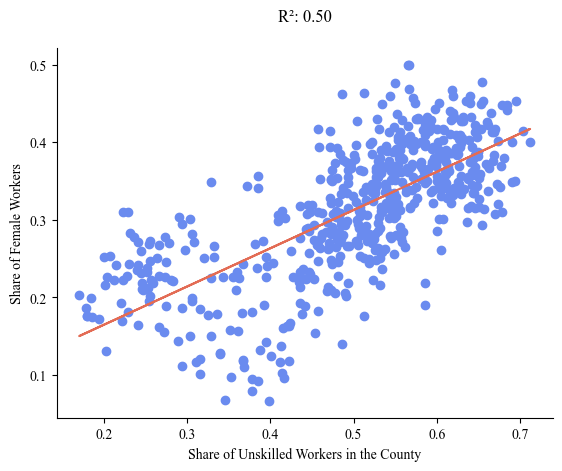

In [50]:
# Set the font to Times New Roman
mpl.rcParams["font.family"] = "Times New Roman"

X = w_a_un["per_unskilled"]
y = w_a_un["share_w"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
r_squared = model.rsquared
p_value = model.pvalues[0]  

# Choosing colors from the coolwarm colormap
scatter_color = cm.coolwarm(0.15)  # blueish
line_color = cm.coolwarm(0.85)     # reddish

plt.scatter(w_a_un["per_unskilled"], w_a_un["share_w"], color=scatter_color)
plt.plot(w_a_un["per_unskilled"], model.predict(X), color=line_color)
plt.xlabel("Share of Unskilled Workers in the County")
plt.ylabel("Share of Female Workers")
plt.title(f"R²: {r_squared:.2f}\n")

# Remove top and right lines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

# Descriptive Overview of professions

In [51]:
grouped_df_total["per_high"] = grouped_df_total["high"] / grouped_df_total["d_Hauptberuf"]
grouped_df_total["per_medium"] = grouped_df_total["medium"] / grouped_df_total["d_Hauptberuf"]
grouped_df_total["per_low"] = grouped_df_total["low"] / grouped_df_total["d_Hauptberuf"]
grouped_df_total["per_unskilled"] = grouped_df_total["unskilled"] / grouped_df_total["d_Hauptberuf"]

In [52]:
grouped_df_total

,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,high,medium,low,unskilled,intermediate,per_high,per_medium,per_low,per_unskilled
0,A,1,2987634.0,2688482.0,5676116.0,0.000000,731074.660493,645258.151939,4.299783e+06,0.0,0.000000,0.128798,0.113680,0.757522
1,A,2,75618.0,16911.0,92529.0,0.000000,0.000000,0.000000,9.252900e+04,0.0,0.000000,0.000000,0.000000,1.000000
2,A,3,1578.0,123.0,1701.0,0.000000,0.000000,0.000000,1.701000e+03,0.0,0.000000,0.000000,0.000000,1.000000
3,A,4,59974.0,7293.0,67267.0,0.000000,14496.333651,52770.666349,0.000000e+00,0.0,0.000000,0.215504,0.784496,0.000000
4,A,5,10345.0,927.0,11272.0,0.000000,0.000000,9070.719536,2.201280e+03,0.0,0.000000,0.000000,0.804713,0.195287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,E,4,120388.0,55900.0,176288.0,48537.193635,116509.315872,11241.490492,0.000000e+00,0.0,0.275329,0.660903,0.063768,0.000000
204,E,5,47718.0,75641.0,123359.0,25348.528119,21277.403891,76733.067990,0.000000e+00,0.0,0.205486,0.172484,0.622031,0.000000
205,E,6,4806.0,561.0,5367.0,5367.000000,0.000000,0.000000,0.000000e+00,0.0,1.000000,0.000000,0.000000,0.000000
206,E,7,5101.0,1492.0,6593.0,0.000000,0.000000,6593.000000,0.000000e+00,0.0,0.000000,0.000000,1.000000,0.000000


In [53]:
grouped_df_total.to_csv(f"{save_path}\Overview Professions.csv", index=False, sep=",")

# Overview Variables

In [54]:
control_df = pd.read_csv(f"{control_all_path}\Independent Variables.csv")
steam_df = pd.read_stata(f"{control_path}\\_FINAL_c_steamenginges_1904.dta")

In [55]:
variables_df = pd.merge(control_df, steam_df, on=["id_inequality"], how="left")

variables_df.columns

Index(['id_inequality', 'rb_id', 'rb_name_x', 'province_id', 's_industry',
       's_prot', 's_german', 'longitud', 'latitud', 'slope_km',
       'soil_suitability', 'mean_temp', 'mean_preci', 'dist_100km',
       'log_distance_carbon_c', 'NAME', 'county_name', 'uni_dummy',
       'min_distance_uni', 'prov_cap_dummy', 'BER_dummy', 'density',
       'steamengines_number', 'horsepower', 'rb_name_y'],
      dtype='object')

In [56]:
columns = ['s_prot', 's_german', 'longitud', 'latitud',
       'soil_suitability', 'mean_temp', 'mean_preci', 'dist_100km',
       'log_distance_carbon_c', 'steamengines_number', 'min_distance_uni', 'density']

stats_df = variables_df[columns].describe()

stats_df.to_csv(f"{save_path}\Overview Variables.csv", index=False, sep=",")

In [57]:
stats_df

,s_prot,s_german,longitud,latitud,soil_suitability,mean_temp,mean_preci,dist_100km,log_distance_carbon_c,steamengines_number,min_distance_uni,density
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,63.369330,88.048297,12.477520,52.107928,2.370371,8.611261,58.374250,0.232226,3.739566,352.833043,0.873112,44.270174
std,35.640707,24.129319,4.609653,1.389015,0.997620,0.831905,12.499298,0.213571,1.535947,383.474261,0.517124,15.232658
min,0.578303,10.005974,6.082967,48.006617,1.000000,6.078000,41.812000,0.000000,0.000000,16.000000,0.000000,22.392157
25%,27.527298,95.756760,8.435314,51.098395,1.750000,8.188000,47.671500,0.065000,2.834082,143.000000,0.514862,32.182064
50%,80.561615,99.134786,11.121249,51.871472,2.222222,8.592000,56.371000,0.174000,3.876164,242.000000,0.762148,47.424723
75%,95.617155,99.676899,16.616657,53.212993,2.806250,9.126500,65.265000,0.346000,5.059188,378.500000,1.165655,52.774890
max,99.363822,99.987179,22.564147,55.648117,9.000000,10.872000,102.047000,1.389000,5.791269,3745.000000,2.542906,70.806302


In [58]:
count_above_100 = (variables_df["s_german"] > 100).sum()

print(f"Number of rows in column 's_german' with values above 100: {count_above_100}")

Number of rows in column 's_german' with values above 100: 0
